In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.ensemble import * 
from sklearn.model_selection import *
from sklearn.linear_model import *
from autoviz.classify_method import*
from sklearn.model_selection import cross_val_score


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [64]:
d= pd.read_csv('Credit Score Classification Dataset.csv', skipinitialspace = True)
d.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [66]:
d.shape

(164, 8)

In [68]:
d.duplicated().sum()

62

In [70]:
d.drop_duplicates(inplace = True)

In [72]:
d.shape

(102, 8)

In [74]:
d.describe().T.style.background_gradient(cmap = 'twilight', axis = 1)

,count,mean,std,min,25%,50%,75%,max
Age,102.000000,38.950980,8.709136,25.000000,31.000000,39.000000,46.750000,53.000000
Income,102.000000,88308.823529,32417.071969,25000.000000,65000.000000,86250.000000,110000.000000,162500.000000
Number of Children,102.000000,0.656863,0.895479,0.000000,0.000000,0.000000,1.000000,3.000000


In [76]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 134
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 102 non-null    int64 
 1   Gender              102 non-null    object
 2   Income              102 non-null    int64 
 3   Education           102 non-null    object
 4   Marital Status      102 non-null    object
 5   Number of Children  102 non-null    int64 
 6   Home Ownership      102 non-null    object
 7   Credit Score        102 non-null    object
dtypes: int64(3), object(5)
memory usage: 7.2+ KB


In [78]:
d.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [80]:
col = d.select_dtypes(include = ['object']).columns.tolist()
le = LabelEncoder()
for i in col:
    le.fit(d[i])
    d[i] = le.transform(d[i])

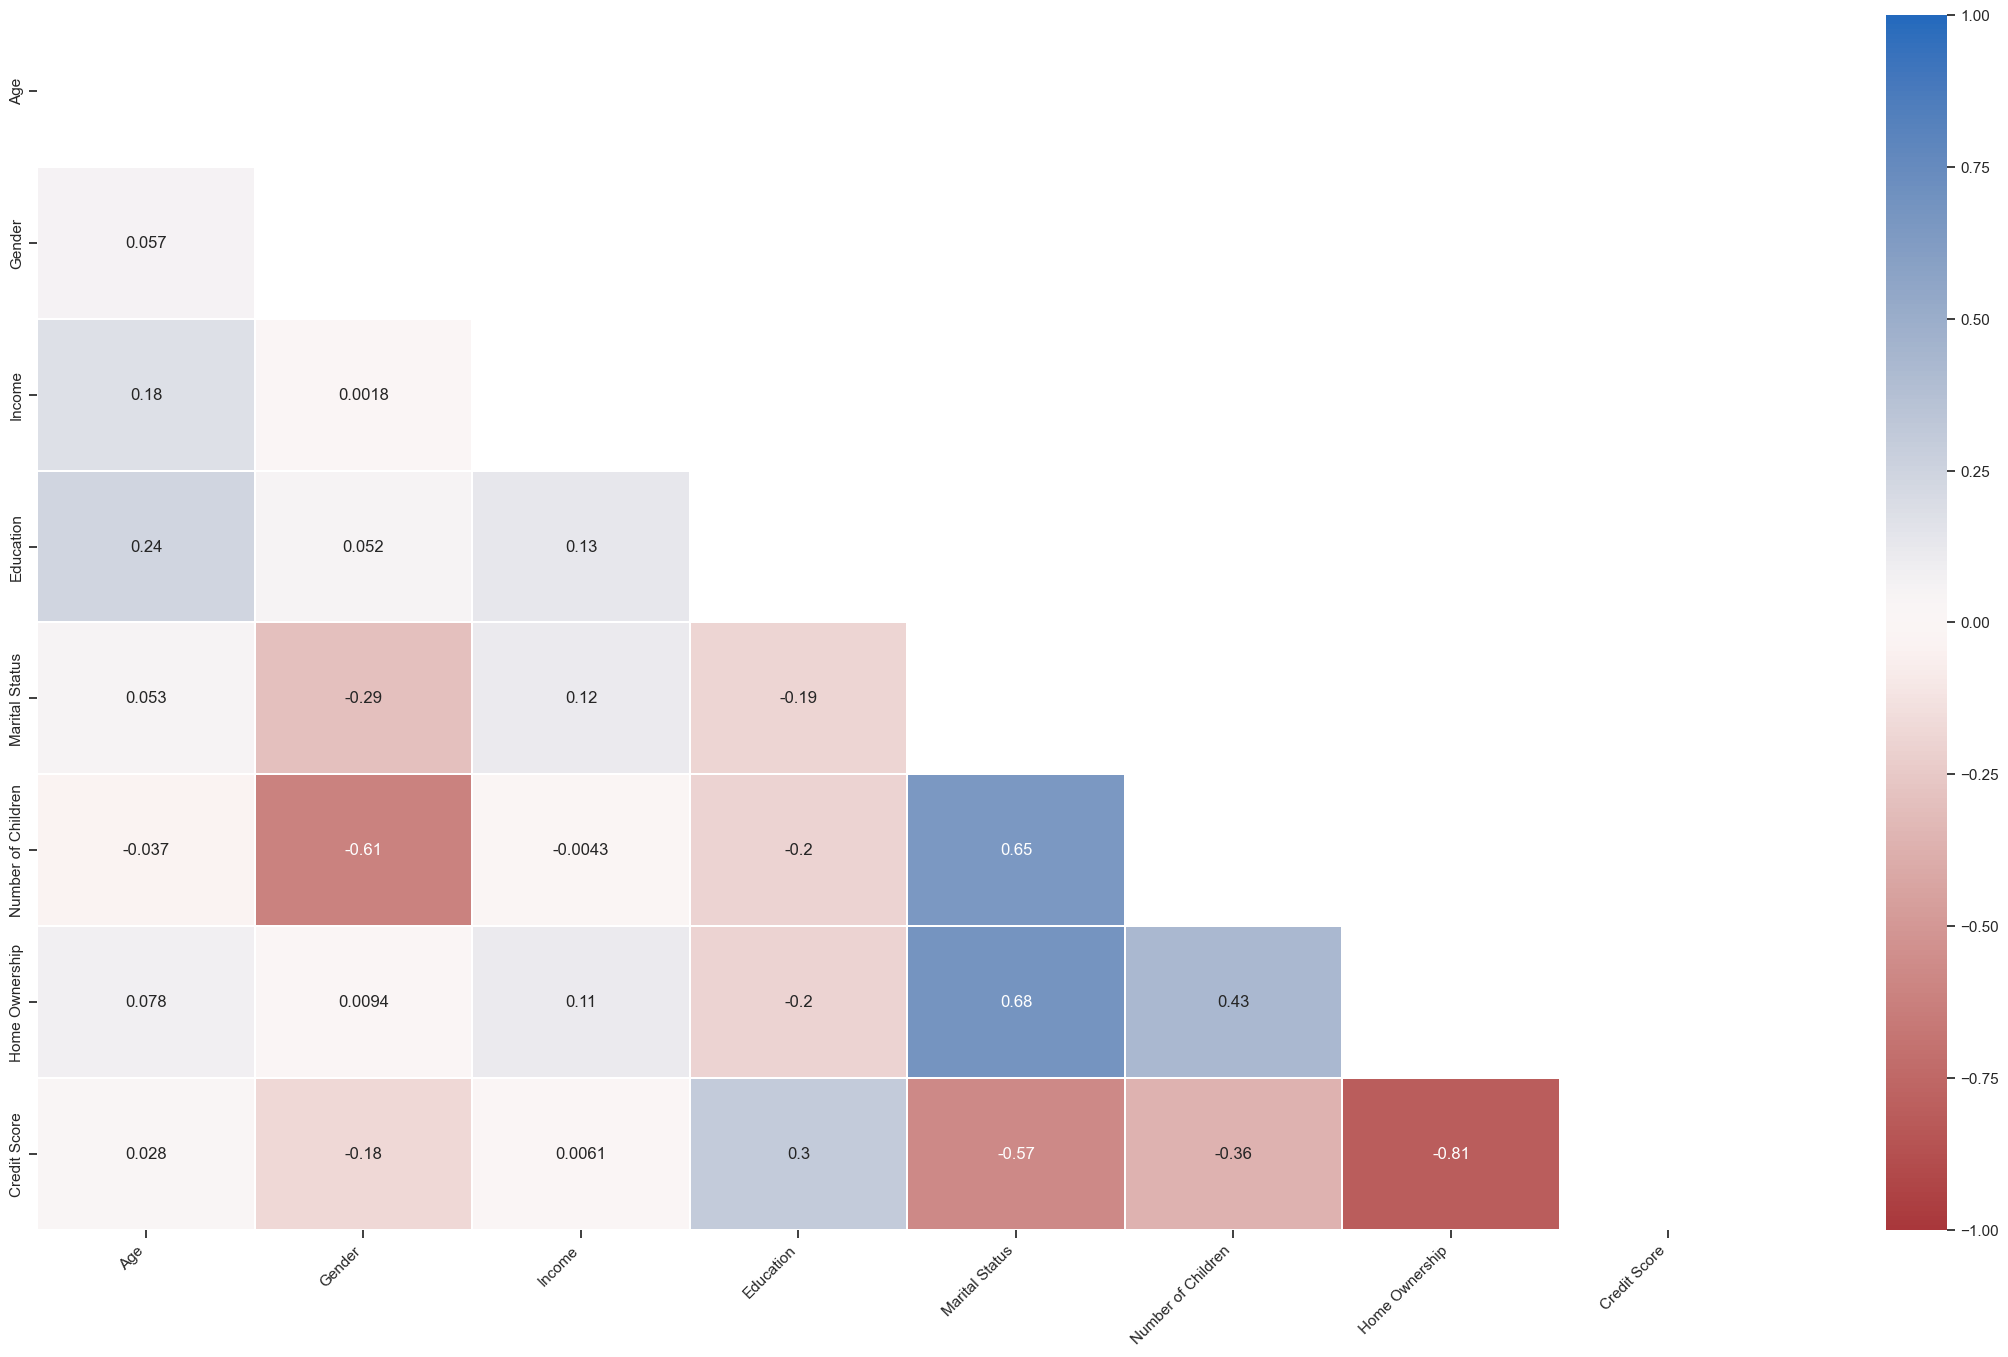

In [82]:
%matplotlib inline
plt.figure(figsize = (25,15))
corr = d.apply(lambda x: pd.factorize(x)[0]).corr()
corr = corr.fillna(0)
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation =0)
ax = sns.heatmap(corr, mask = mask, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, linewidths = 0.2, cmap = 'vlag_r', vmin = -1, vmax = 1)
plt.show()

In [83]:
d['Credit Score'].value_counts()

Credit Score
1    75
0    21
2     6
Name: count, dtype: int64

In [84]:
import autoviz.classify_method as cm
print(dir(cm))


['DataConversionWarning', 'EDA_find_remove_columns_with_infinity', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'classify_columns', 'copy', 'left_subtract', 'np', 'pd', 'random', 'reduce', 'warn', 'warnings']


In [88]:
 classify_columns(d)


#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    8 Predictors classified...


{'cols_delete': [],
 'string_bool_vars': [],
 'num_bool_vars': ['Gender', 'Marital Status', 'Home Ownership'],
 'nlp_vars': [],
 'discrete_string_vars': [],
 'factor_vars': [],
 'int_vars': ['Age',
  'Income',
  'Education',
  'Number of Children',
  'Credit Score'],
 'date_vars': [],
 'id_vars': [],
 'cat_vars': [],
 'continuous_vars': []}

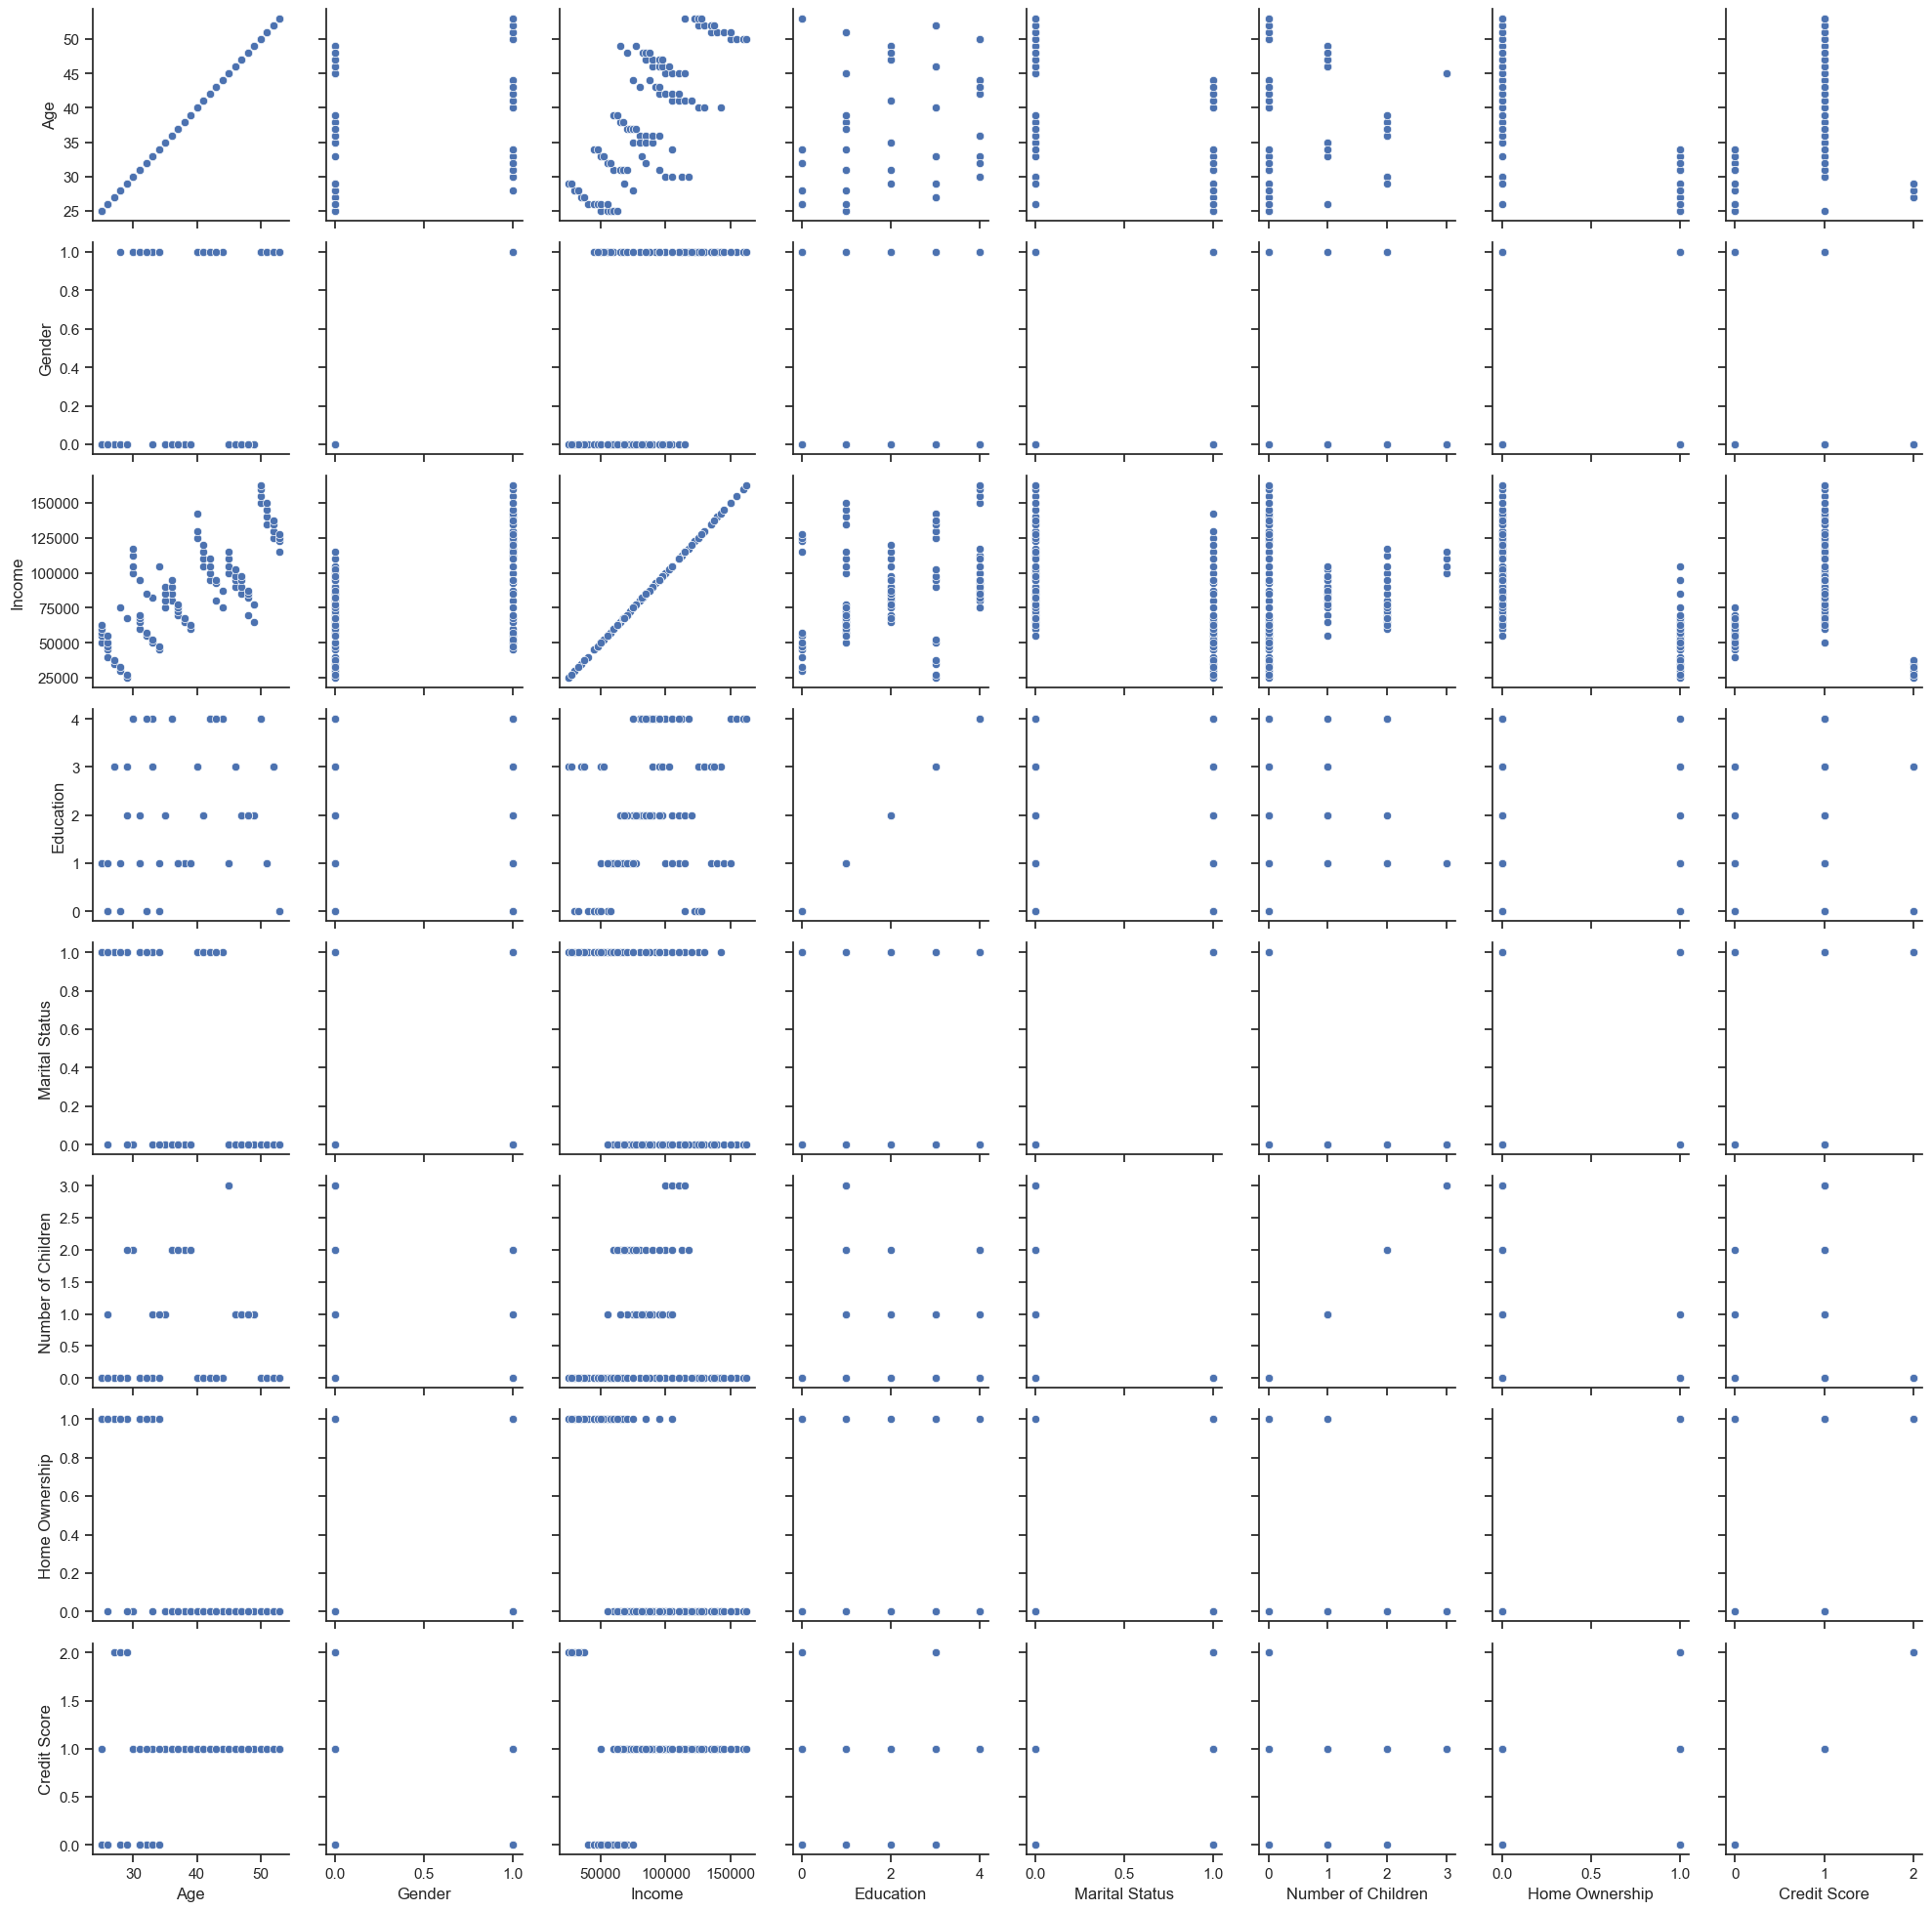

In [90]:
%matplotlib inline
p = sns.PairGrid(d)
p.map(sns.scatterplot)
plt.show()

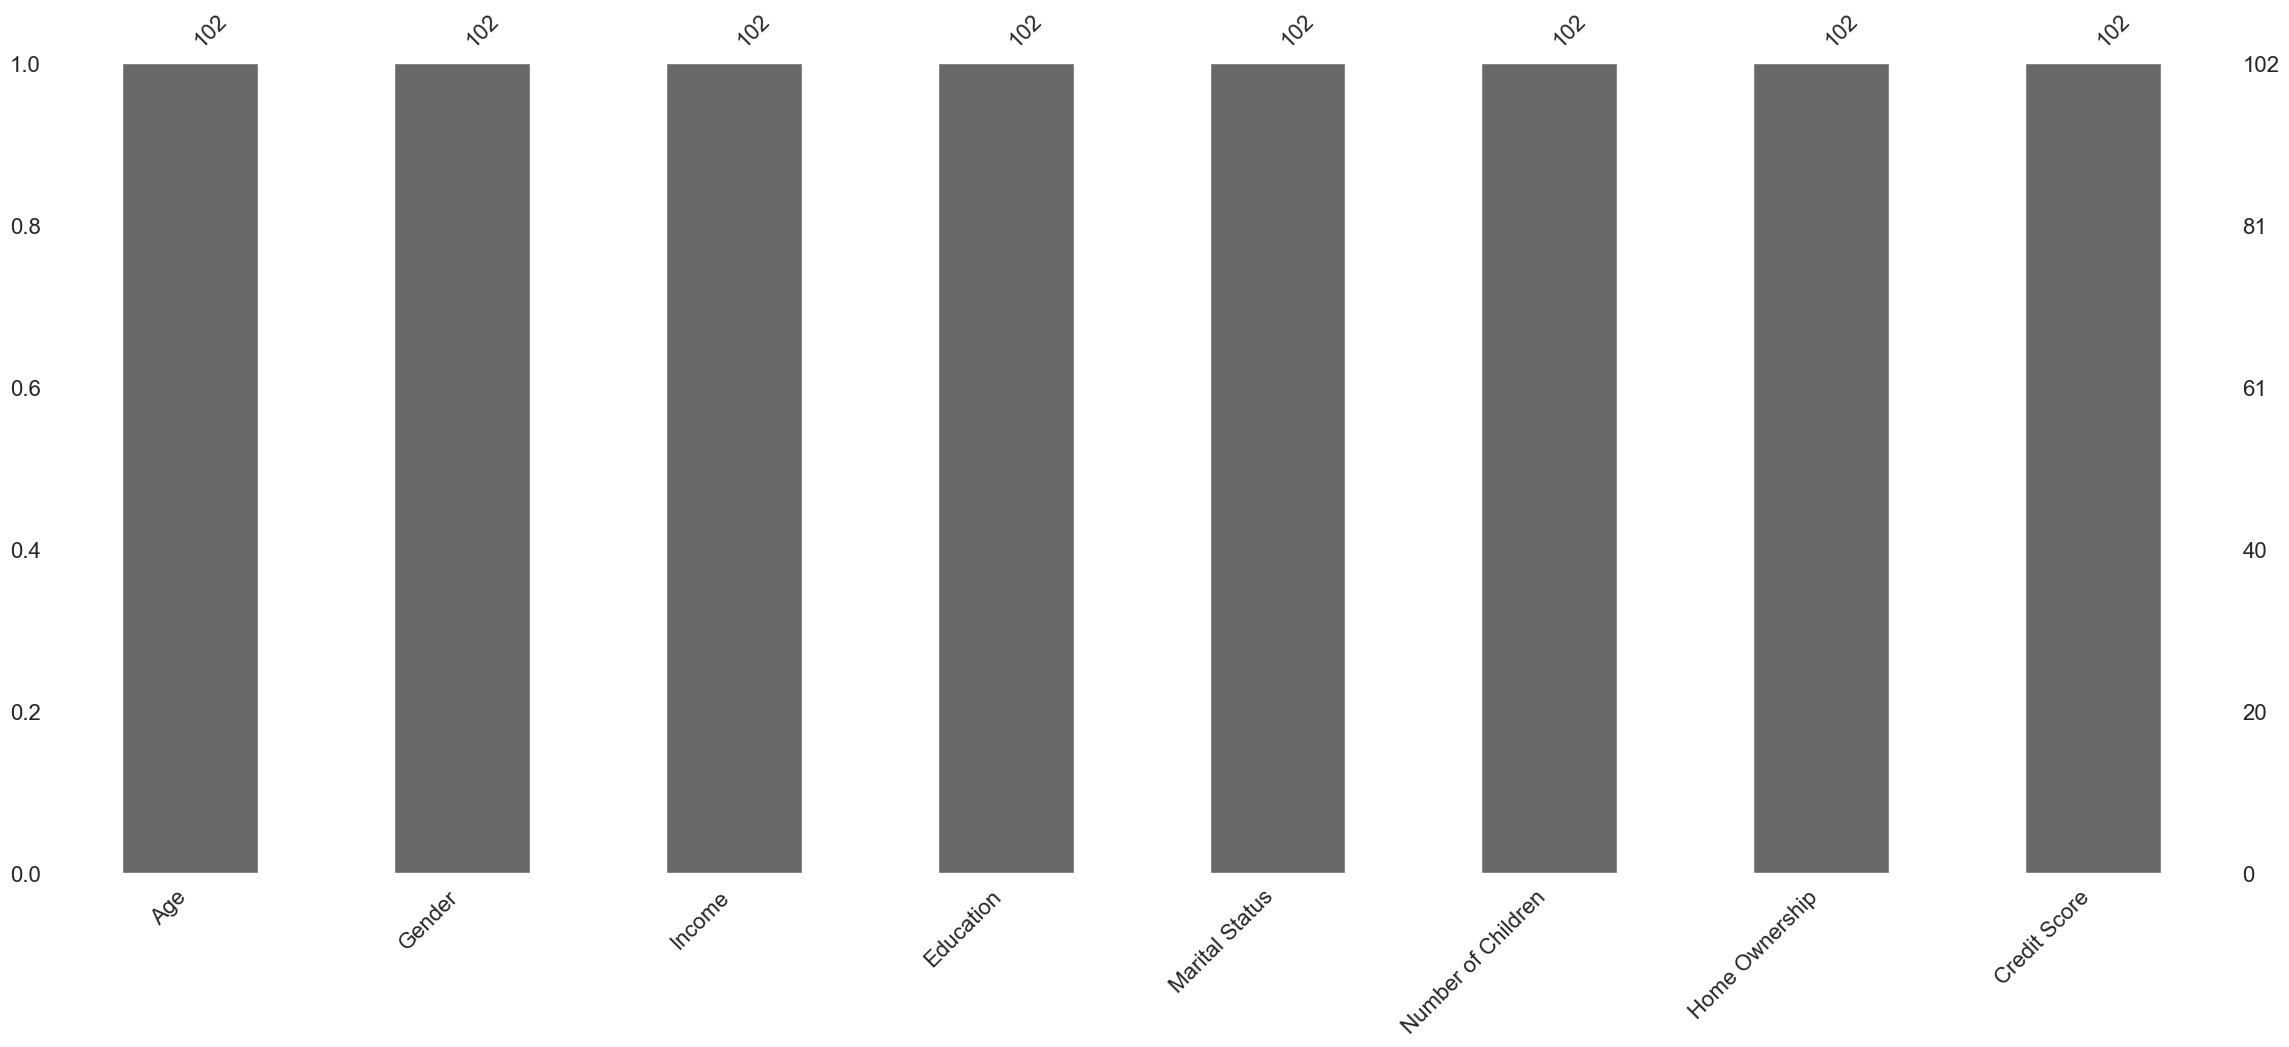

In [91]:
import missingno as msno
nulplot = msno.bar(d)
nulplot
plt.show()

# SMOTE

In [36]:
x= d.drop(columns = 'Credit Score', axis = 1)
y = d['Credit Score']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 31)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 31,k_neighbors=2)
x_train_s,y_train_s = sm.fit_resample(x_train,y_train)
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_s.value_counts())

Class distribution before resampling: Credit Score
1    58
0    18
2     5
Name: count, dtype: int64
Class distribution after resampling: Credit Score
1    58
0    58
2    58
Name: count, dtype: int64


In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model = knn.fit(x_train,y_train)

In [167]:
pred = model.predict(x_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1])

In [179]:
scores = cross_val_score(knn, x_train, y_train, cv=20)
scores

array([1.  , 0.75, 1.  , 0.75, 1.  , 0.75, 1.  , 0.75, 1.  , 0.75, 1.  ,
       0.75, 0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [173]:
predtr = model.predict(x_train)
predtr
accuracy_score(y_train,predtr)*100

96.29629629629629

In [130]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.67      0.67      0.67         3\n           1       0.94      0.94      0.94        17\n           2       1.00      1.00      1.00         1\n\n    accuracy                           0.90        21\n   macro avg       0.87      0.87      0.87        21\nweighted avg       0.90      0.90      0.90        21\n'

In [132]:
confusion_matrix(y_test,pred)

array([[ 2,  1,  0],
       [ 1, 16,  0],
       [ 0,  0,  1]], dtype=int64)

In [144]:
accuracy_score(y_test,pred)

0.9047619047619048

# Random Forest

In [146]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf = rf.predict(x_test)
dacc = accuracy_score(y_test,y_predrf)*100
pd.DataFrame({'actual': y_test, 'predicted':y_predrf})

,actual,predicted
17,1,1
50,1,1
39,1,1
36,0,0
0,1,0
34,1,1
33,1,1
3,1,1
108,1,1
8,1,1


In [148]:
dacc

95.23809523809523

In [177]:
y_predrftr = rf.predict(x_train)
dactr = accuracy_score(y_train,y_predrftr)*100
dactr

100.0